In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import plotly.graph_objects as go

In [13]:
data = pd.read_excel('/content/drive/MyDrive/Respirer Ass/cons_data_all_res.xlsx')
data.head(10)

,Time,year,moy_date,doy_date,busday,season,dow_date,hour,month_name,temp,...,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12
0,2017-01-01 00:00:00,2017,1,1,False,Winter,1,0,January,22.0,...,0.0821,0.0667,0.2131,0.0854,0.1277,0.2173,0.1478,0.1568,1.1462,0.2553
1,2017-01-01 01:00:00,2017,1,1,False,Winter,1,1,January,22.0,...,0.0989,0.1047,0.1719,0.0948,0.1112,0.2411,0.1597,0.4315,0.2193,0.5326
2,2017-01-01 02:00:00,2017,1,1,False,Winter,1,2,January,22.0,...,0.0990,0.1001,0.1865,0.0978,0.1850,0.8316,0.2118,1.4843,0.1563,0.3818
3,2017-01-01 03:00:00,2017,1,1,False,Winter,1,3,January,23.5,...,0.1038,0.1354,0.1882,0.1064,0.0970,0.6645,0.2361,1.3716,0.2327,0.3798
4,2017-01-01 04:00:00,2017,1,1,False,Winter,1,4,January,27.0,...,0.0780,0.3508,0.2092,0.2456,0.1374,1.9451,0.3902,0.2105,0.2395,0.5176
5,2017-01-01 05:00:00,2017,1,1,False,Winter,1,5,January,29.0,...,0.1153,0.7412,0.2306,0.7668,0.4384,0.6514,0.4769,0.1426,0.2461,0.4131
6,2017-01-01 06:00:00,2017,1,1,False,Winter,1,6,January,30.0,...,0.1327,0.2792,0.2880,0.1267,0.5738,0.2422,0.3423,0.2225,0.0978,0.3354
7,2017-01-01 07:00:00,2017,1,1,False,Winter,1,7,January,30.0,...,0.7871,0.3219,0.2339,1.8432,0.9020,0.1362,0.2181,0.2799,0.3192,0.2133
8,2017-01-01 08:00:00,2017,1,1,False,Winter,1,8,January,30.0,...,0.3496,0.1488,0.5232,0.2011,0.1040,0.1106,0.3632,0.3009,0.3546,0.1842
9,2017-01-01 09:00:00,2017,1,1,False,Winter,1,9,January,30.0,...,0.2224,0.1981,0.5781,0.1378,0.1989,0.0981,0.2780,0.5510,0.2461,0.1821


##PCA and Clusturing


```
# This is formatted as code
```



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



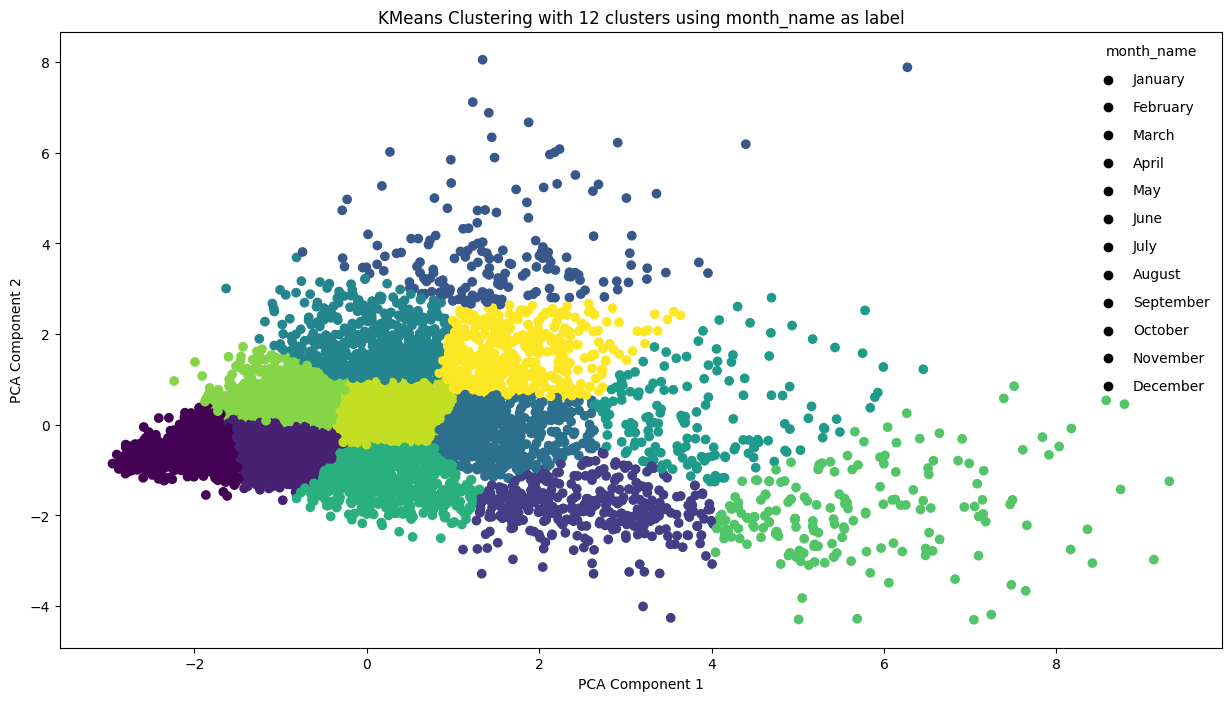

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



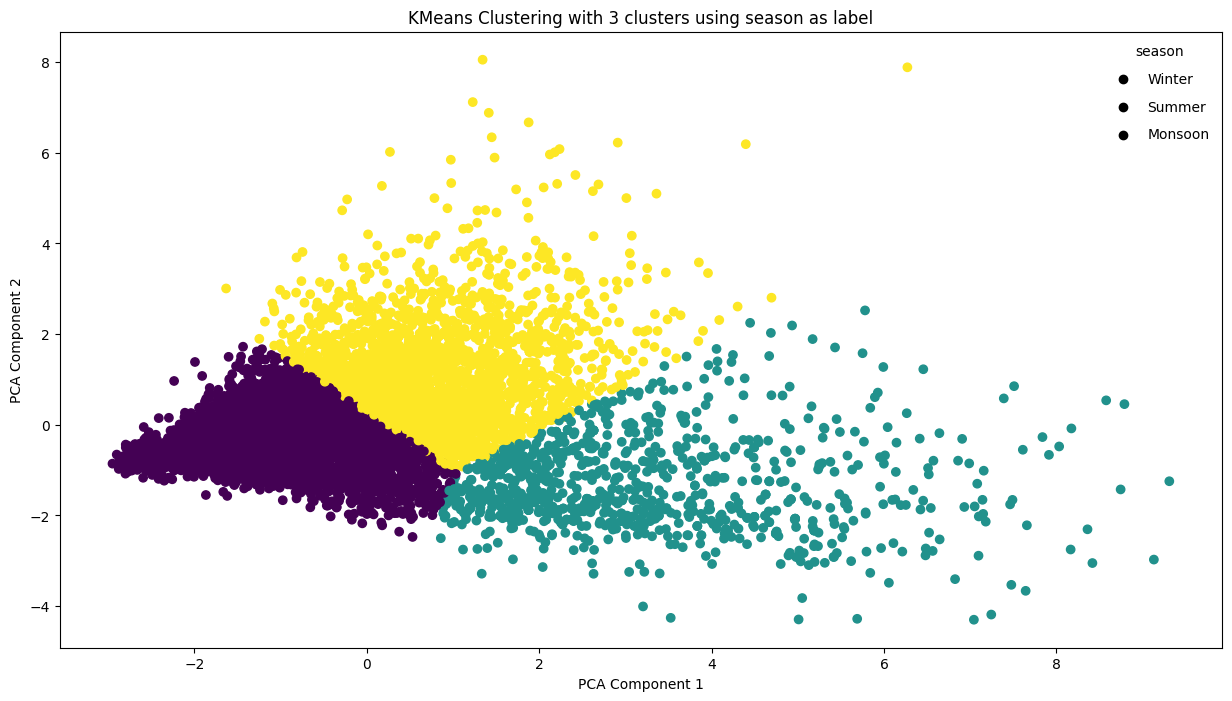

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



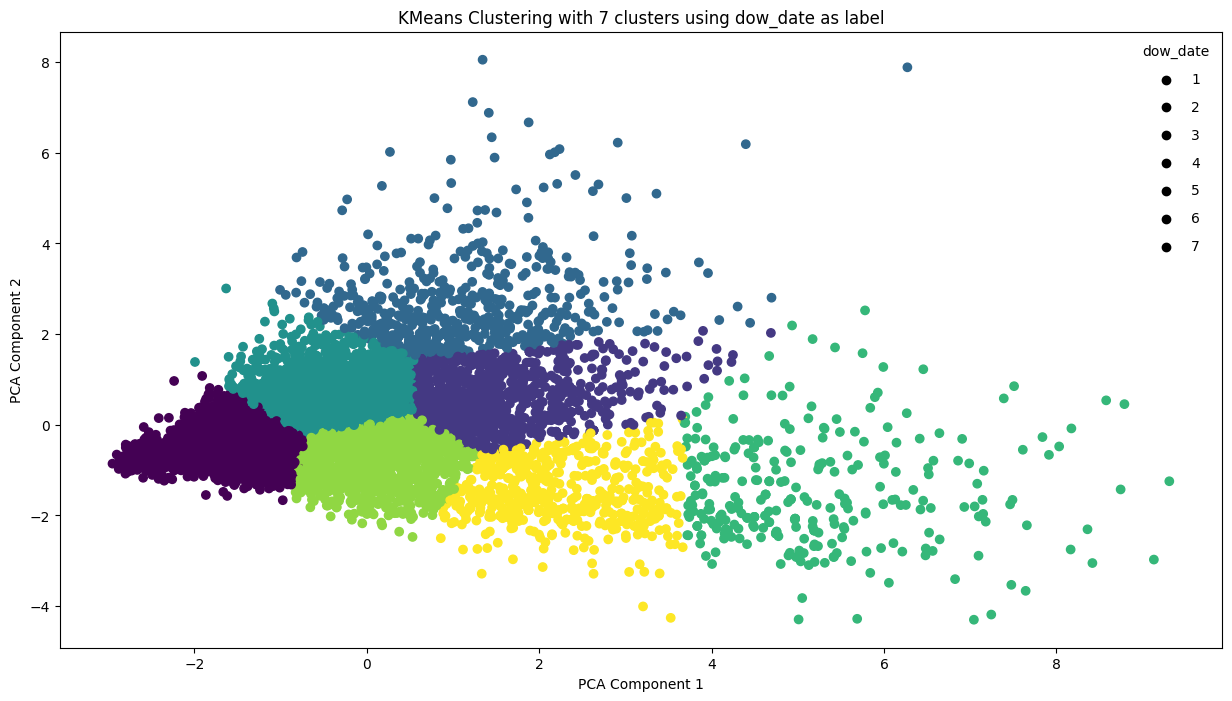

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



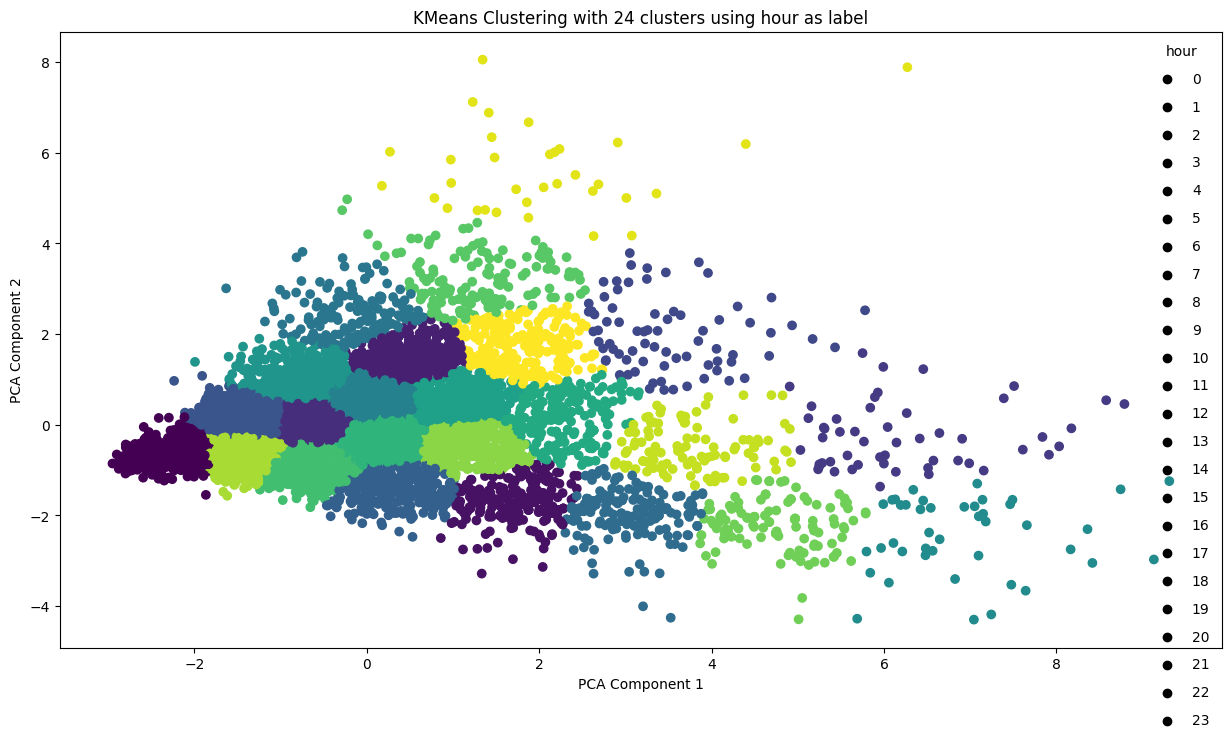

In [14]:
features = data[['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
label_columns = ['month_name', 'season', 'dow_date', 'hour']

for label_column in label_columns:
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(scaled_features)

    n_comp = len(data[label_column].unique())

    kmeans = KMeans(n_clusters=n_comp)
    kmeans.fit(pca_features)
    labels = kmeans.labels_

    plt.figure(figsize=(15, 8))
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels, cmap='viridis')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('KMeans Clustering with {} clusters using {} as label'.format(n_comp, label_column))

    unique_values = data[label_column].unique()
    for i, value in enumerate(unique_values):
        plt.scatter([], [], label=str(value).strip(), c='k', marker='o')
    plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title=label_column)
    plt.show()

##LDA and Clusturing


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



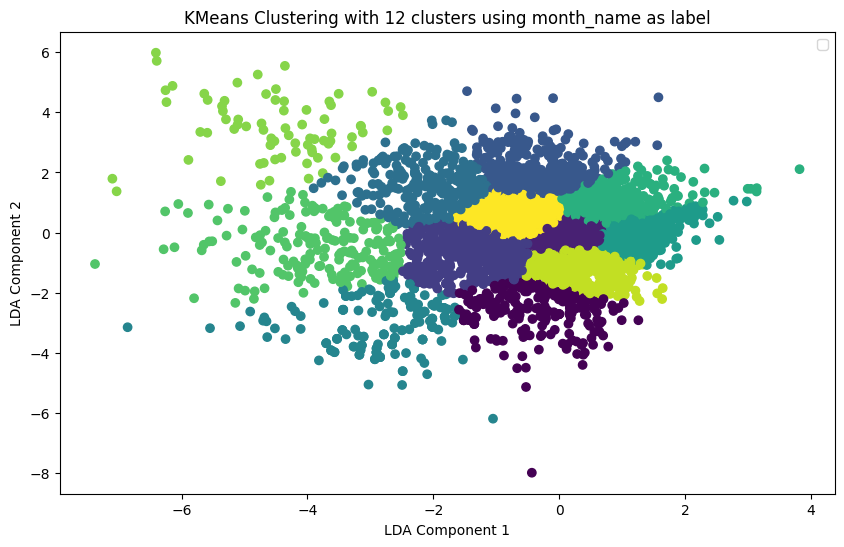

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



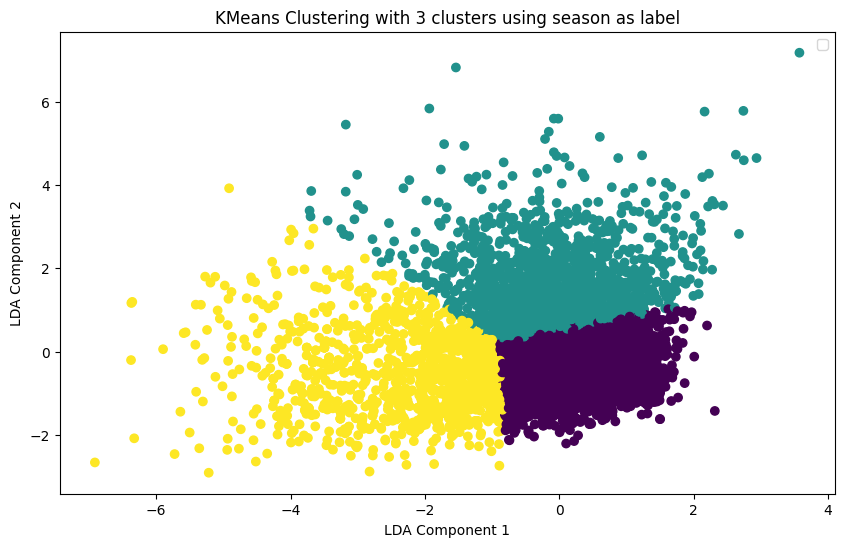

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



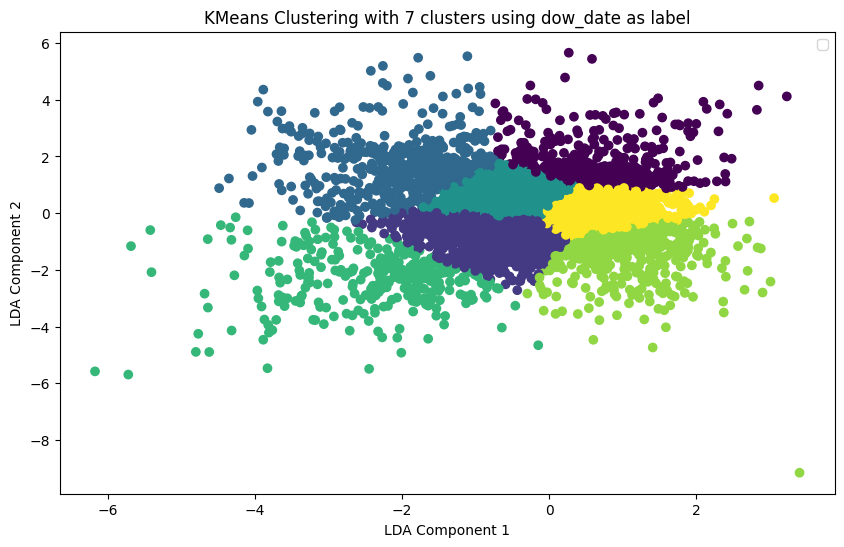

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



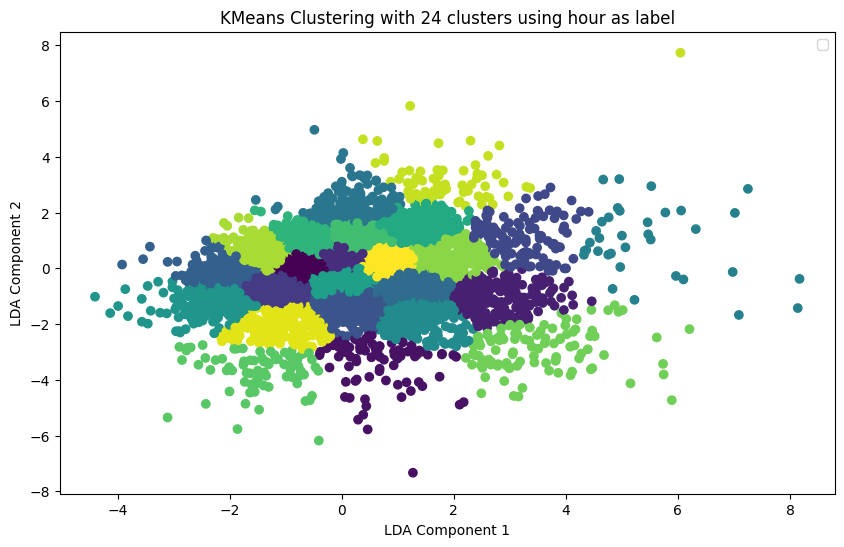

In [15]:
for label_column in label_columns:
    lda = LinearDiscriminantAnalysis(n_components=2)
    lda_features = lda.fit_transform(scaled_features, data[label_column])
    n_comp = len(data[label_column].unique())
    kmeans = KMeans(n_clusters=n_comp)
    kmeans.fit(lda_features)

    labels = kmeans.labels_

    plt.figure(figsize=(10, 6))
    plt.scatter(lda_features[:, 0], lda_features[:, 1], c=labels, cmap='viridis')
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.title('KMeans Clustering with {} clusters using {} as label'.format(n_comp, label_column))
    unique_values = []
    for value in data[label_column].unique():
        unique_values.append(str(value).strip())
    plt.legend()
    plt.show()

###Dimensionality Reduction with PCA and LDA:

Curse of Dimensionality: When dealing with high-dimensional data, the number of features can be very large, leading to computational inefficiency and increased complexity.

PCA: PCA is used to reduce the dimensionality of the feature space while preserving the maximum amount of variance in the data. It transforms the data into a new set of orthogonal components called principal components.

LDA: LDA is a supervised dimensionality reduction technique that maximizes the separation between classes while reducing the dimensionality of the feature space. It aims to find the linear combinations of features that best discriminate between different classes.

####Clustering with KMeans:

Unsupervised Learning: KMeans clustering is an unsupervised learning algorithm used for partitioning data into distinct groups or clusters based on similarity.
PCA and LDA are used prior to clustering with KMeans to reduce the dimensionality of the feature space and improve the performance of clustering algorithms.